In [53]:
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt 
import math 

from __future__ import absolute_import, division, print_function, unicode_literals

**scalers (0D tensor)**

In [4]:
x = np.array(10)
x.shape, x, x.ndim, x.dtype

((), array(10), 0, dtype('int32'))

**vectors (1D tensor)**

In [5]:
x = np.array([4, 2, 5, 9])
x.shape, x, x.ndim, x.dtype

((4,), array([4, 2, 5, 9]), 1, dtype('int32'))

**Matrices (2D tensor)**

In [6]:
x = np.array([[1, 2, 3], [2, 3, 4], [3, 4, 5]])
x.shape, x, x.ndim, x.dtype

((3, 3),
 array([[1, 2, 3],
        [2, 3, 4],
        [3, 4, 5]]),
 2,
 dtype('int32'))

**3D tensor**

we can pack tensors of n-1 dim in a new array to get a tensor of n dim

In [9]:
x = np.array([[[1, 2, 3], [2, 3, 4], [3, 4, 5]], [[1, 2, 3], [2, 3, 4], [3, 4, 5]], [[1, 2, 3], [2, 3, 4], [3, 4, 5]]])
x.shape, x, x.ndim, x.dtype

((3, 3, 3),
 array([[[1, 2, 3],
         [2, 3, 4],
         [3, 4, 5]],
 
        [[1, 2, 3],
         [2, 3, 4],
         [3, 4, 5]],
 
        [[1, 2, 3],
         [2, 3, 4],
         [3, 4, 5]]]),
 3,
 dtype('int32'))

### Tensorflow 

| Tensor | Example               | Shape                             | Dataset        |
|--------|-----------------------|------------------------------------|----------------|
| 2D     | Vector                | (samples, features)                | Text Documents |
| 3D     | Time series or Sequence| (samples, timesteps, features)     | Stock Prices   |
| 4D     | Images                | (samples, channels, height, width) | MNIST Digit    |
| 5D     | Videos                | (samples, frames, channels, height, widths) | Test Videos  |


In [11]:
mnist = tf.keras.datasets.mnist 

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test/255.0

In [63]:
def show_attribute(tensor) :
    print("attribute of the given tensor")
    print("="*35)
    print("num of axes in tensor : ", tensor.ndim)
    print("shape of tensor : ", tensor.shape)
    print("data type of tensor : ", tensor.dtype)
    print("")

show_attribute(X_train)

attribute of the given tensor
num of axes in tensor :  3
shape of tensor :  (60000, 28, 28)
data type of tensor :  float64



In [64]:
show_attribute(y_train)

attribute of the given tensor
num of axes in tensor :  1
shape of tensor :  (60000,)
data type of tensor :  uint8



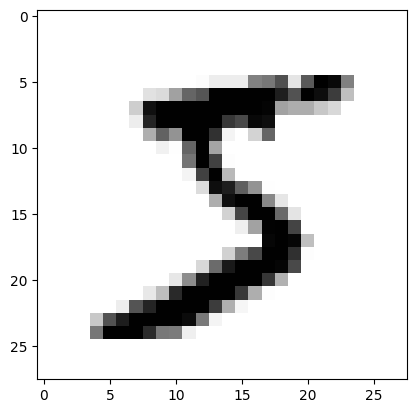

In [65]:
def display_image(img) : 
    plt.imshow(img, cmap = plt.cm.binary)
    plt.show()

x_1 = X_train[0]
display_image(x_1)

In [66]:
x_train_slice = X_train[10:100] # == X_train[10:100, :, :] == X_train[10:100, 0:28, 0:28] 

show_attribute(x_train_slice)

attribute of the given tensor
num of axes in tensor :  3
shape of tensor :  (90, 28, 28)
data type of tensor :  float64



attribute of the given tensor
num of axes in tensor :  3
shape of tensor :  (60000, 14, 14)
data type of tensor :  float64



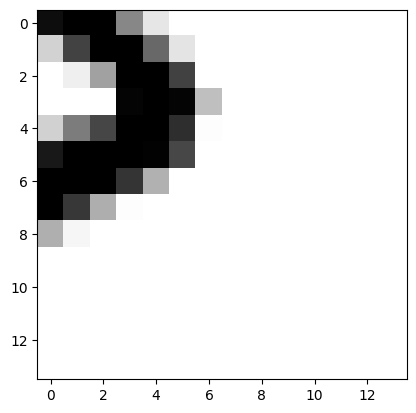

In [67]:
# bottom right patch 
x_train_slice = X_train[:, 14:, 14:] 
show_attribute(x_train_slice)
display_image(x_train_slice[0])

attribute of the given tensor
num of axes in tensor :  3
shape of tensor :  (60000, 14, 14)
data type of tensor :  float64



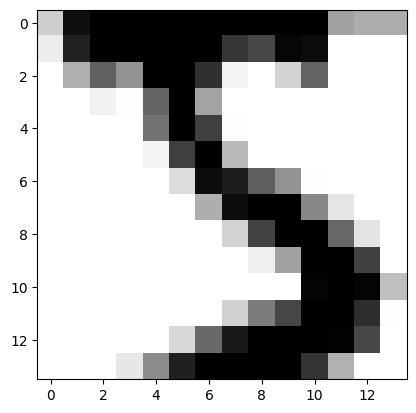

In [68]:
# center patch 
x_train_slice = X_train[:, 7:-7, 7:-7] 
show_attribute(x_train_slice)
display_image(x_train_slice[0])

#### Data Batches 

In [69]:
batch_1 = X_train[:128]
show_attribute(batch_1)
batch_2 = X_train[128:256]
show_attribute(batch_2)

attribute of the given tensor
num of axes in tensor :  3
shape of tensor :  (128, 28, 28)
data type of tensor :  float64

attribute of the given tensor
num of axes in tensor :  3
shape of tensor :  (128, 28, 28)
data type of tensor :  float64



### Maths 

In [70]:
w = np.array([[1, 0.5], [2, 1]])
show_attribute(w)
input_vector = np.array([[1, 2], [-1, 2]])
show_attribute(input_vector)
bias = np.array([-2.0, 0.5])
show_attribute(bias)

attribute of the given tensor
num of axes in tensor :  2
shape of tensor :  (2, 2)
data type of tensor :  float64

attribute of the given tensor
num of axes in tensor :  2
shape of tensor :  (2, 2)
data type of tensor :  int32

attribute of the given tensor
num of axes in tensor :  1
shape of tensor :  (2,)
data type of tensor :  float64



In [71]:
z = np.dot(w, input_vector) + bias
show_attribute(z)
z

attribute of the given tensor
num of axes in tensor :  2
shape of tensor :  (2, 2)
data type of tensor :  float64



array([[-1.5,  3.5],
       [-1. ,  6.5]])

#### ReLu

In [72]:
output = np.maximum(0., z)
show_attribute(output)
print(output)

attribute of the given tensor
num of axes in tensor :  2
shape of tensor :  (2, 2)
data type of tensor :  float64

[[0.  3.5]
 [0.  6.5]]


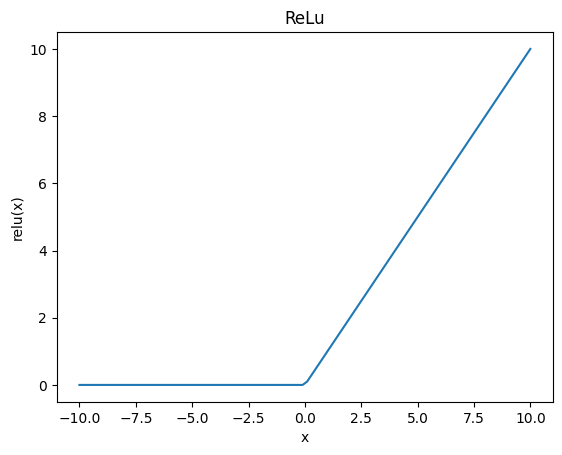

In [73]:
x = np.linspace(-10, 10, 100)
z = np.maximum(0., x)
plt.plot(x, z)
plt.xlabel('x')
plt.ylabel('relu(x)')
plt.title("ReLu");

#### Sigmoid 

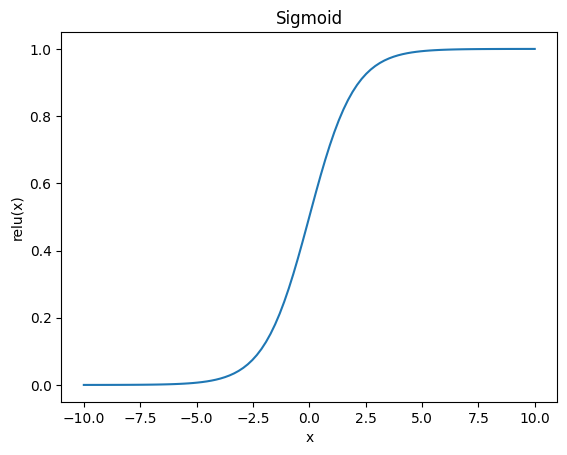

In [74]:
x = np.linspace(-10, 10, 100)
z = 1/(1+np.exp(-x))
plt.plot(x, z)
plt.xlabel('x')
plt.ylabel('relu(x)')
plt.title("Sigmoid");

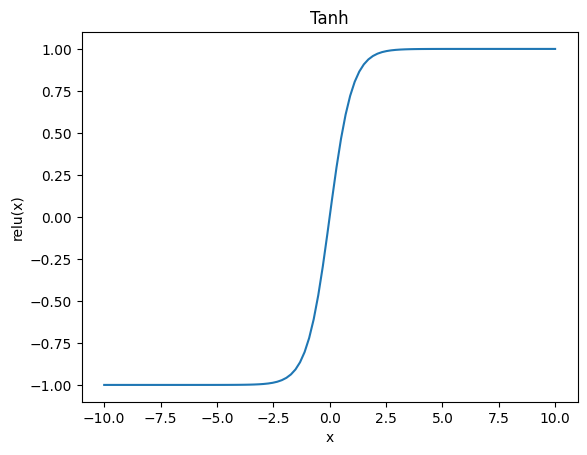

In [75]:
x = np.linspace(-10, 10, 100)
z = (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
plt.plot(x, z)
plt.xlabel('x')
plt.ylabel('relu(x)')
plt.title("Tanh");

#### Broadcasting
1. Axes are added to smaller tensor to match the dim of larger tensor. These axes are called broadcast axes. 
2. The smaller tensor is repeated alongside these new axes to match the full shape of the larger tensor.

In [79]:
x_1 = np.random.randn(32, 10)
show_attribute(x_1)
x_2 = np.random.randn(10,)
show_attribute(x_2)

attribute of the given tensor
num of axes in tensor :  2
shape of tensor :  (32, 10)
data type of tensor :  float64

attribute of the given tensor
num of axes in tensor :  1
shape of tensor :  (10,)
data type of tensor :  float64



In [80]:
x_2 = np.expand_dims(x_2, axis=0)
show_attribute(x_2)
x_2 = np.repeat(x_2, 32, axis=0)
show_attribute(x_2)

attribute of the given tensor
num of axes in tensor :  2
shape of tensor :  (1, 10)
data type of tensor :  float64

attribute of the given tensor
num of axes in tensor :  2
shape of tensor :  (32, 10)
data type of tensor :  float64



numpy does this broadcasting automatically

In [81]:
x_1 = np.random.randn(32, 10) 
x_2 = np.random.randn(10,)
print((x_1 + x_2).shape)

(32, 10)


#### Reshaping

In [85]:
x = np.array([[0, 1], [2, 3], [4, 5]])
show_attribute(x)
print(x)
x = x.reshape((6, 1))
show_attribute(x)
print(x)

attribute of the given tensor
num of axes in tensor :  2
shape of tensor :  (3, 2)
data type of tensor :  int32

[[0 1]
 [2 3]
 [4 5]]
attribute of the given tensor
num of axes in tensor :  2
shape of tensor :  (6, 1)
data type of tensor :  int32

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]]


In [89]:
x = np.zeros((200, 20))
show_attribute(x)
print(x)
x = np.transpose(x)
show_attribute(x)

attribute of the given tensor
num of axes in tensor :  2
shape of tensor :  (200, 20)
data type of tensor :  float64

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
attribute of the given tensor
num of axes in tensor :  2
shape of tensor :  (20, 200)
data type of tensor :  float64

